In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [38]:
import pickle
x_vals, y_vals = pickle.load( open( "svmstorm.data", "rb" )) 
x_vals = np.array([np.array(xi) for xi in x_vals])
y_vals = np.array([np.array(xi) for xi in y_vals])

In [39]:
# Create graph session 
sess = tf.Session()
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [40]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [41]:
# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [42]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 16], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [43]:
# Create variables for both NN layers
hidden_layer_nodes = 10
A1 = tf.Variable(tf.random_normal(shape=[16,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1]))   # 1 bias for the output


# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# Declare loss function (MSE)
loss = tf.reduce_mean(tf.square(y_target - final_output))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

In [44]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
test_loss = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.252124
Generation: 100. Loss = 0.264879
Generation: 150. Loss = 0.30922
Generation: 200. Loss = 0.291173
Generation: 250. Loss = 0.231859
Generation: 300. Loss = 0.258742
Generation: 350. Loss = 0.263856
Generation: 400. Loss = 0.313929
Generation: 450. Loss = 0.336078
Generation: 500. Loss = 0.188098
Generation: 550. Loss = 0.280923
Generation: 600. Loss = 0.446566
Generation: 650. Loss = 0.254728
Generation: 700. Loss = 0.249667
Generation: 750. Loss = 0.287248
Generation: 800. Loss = 0.293408
Generation: 850. Loss = 0.277199
Generation: 900. Loss = 0.230476
Generation: 950. Loss = 0.30042
Generation: 1000. Loss = 0.235502
Generation: 1050. Loss = 0.352386
Generation: 1100. Loss = 0.507805
Generation: 1150. Loss = 0.238182
Generation: 1200. Loss = 0.237408
Generation: 1250. Loss = 0.270593
Generation: 1300. Loss = 0.384112
Generation: 1350. Loss = 0.288781
Generation: 1400. Loss = 0.309485
Generation: 1450. Loss = 0.259652
Generation: 1500. Loss = 0.223071


In [27]:
#entity grid with only 2 entities
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

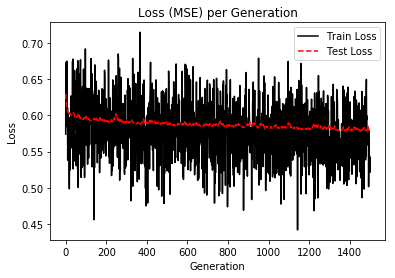

In [36]:
#svm22 I think this is full entity grid
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [45]:
#storm data
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()